# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Get random longitude
lon = np.random.uniform (low=-1.8, high=1.8, size=(2000)) * 100

# Get random Latitude
lat = np.random.uniform (low=-0.9, high=0.9, size=(2000)) * 100

# Combine random latitude and longitude coordinates
coordinates = np.stack((lat, lon), axis=-1)

In [3]:
# Create cities data frame
cities_raw = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities_raw.append(citipy.nearest_city(lat, lon))
    
dup_items = set()
cities = []
for x in cities_raw:
    if x not in dup_items:
        cities.append(x)
        dup_items.add(x)
    
print(len(cities))

773


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "48e3ae93dc88f01b3a7989b36e47e8fd"
units = "Imperial"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# set up lists to hold reponse info
ow_date = []
ow_city = []
ow_country = []
ow_cloud = []
ow_humid = []
ow_lat = []
ow_lon = []
ow_maxtmp = []
ow_wind = []

x = 1
    
# Build query URL
for city in cities:
    
   
    name = city.city_name
    print("Retreiving data for City #"+ str(x) + " of " + str((len(cities))) + " ... "  + name )
    
    query_url = url + "appid=" + api_key + "&q=" + name + "&units=" + units
    print(query_url)
    print(50 * "-")
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
   
    # Catch wrong city name exception
    try:
   
        ow_date.append(weather_json['dt'])
        ow_city.append(weather_json['name'])
        ow_country.append(weather_json['sys']['country'])
        ow_lat.append(weather_json['coord']['lat'])
        ow_lon.append(weather_json['coord']['lon'])
        ow_maxtmp.append(weather_json['main']['temp_max'])
        ow_humid.append(weather_json['main']['humidity'])
        ow_cloud.append(weather_json['clouds']['all'])
        ow_wind.append(weather_json['wind']['speed'])
        
        x = x + 1
            
    except:
             print("Oops! That was a wrong city name. Try again...")
             print(50 * "-")
            
   
    # Timer to pause for a second after each record - not too exceed 60 API calls per minute limit
    time.sleep(1)

Retreiving data for City #1 of 773 ... taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=taolanaro&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #1 of 773 ... rikitea
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=rikitea&units=Imperial
--------------------------------------------------
Retreiving data for City #2 of 773 ... ginir
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=ginir&units=Imperial
--------------------------------------------------
Retreiving data for City #3 of 773 ... vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=vestmannaeyjar&units=Imperial
--------------------------------------------------
Retreiving data for City #4 of 773 ... iqaluit
http:

Retreiving data for City #37 of 773 ... ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=ribeira grande&units=Imperial
--------------------------------------------------
Retreiving data for City #38 of 773 ... castro
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=castro&units=Imperial
--------------------------------------------------
Retreiving data for City #39 of 773 ... terrace
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=terrace&units=Imperial
--------------------------------------------------
Retreiving data for City #40 of 773 ... san vicente
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=san vicente&units=Imperial
--------------------------------------------------
Retreiving data for City #41 of 773 ... tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=

Retreiving data for City #67 of 773 ... aswan
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=aswan&units=Imperial
--------------------------------------------------
Retreiving data for City #68 of 773 ... atuona
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=atuona&units=Imperial
--------------------------------------------------
Retreiving data for City #69 of 773 ... saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=saint-pierre&units=Imperial
--------------------------------------------------
Retreiving data for City #70 of 773 ... tchaourou
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=tchaourou&units=Imperial
--------------------------------------------------
Retreiving data for City #71 of 773 ... stephenville
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=stephenvill

Retreiving data for City #103 of 773 ... santa rosa
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=santa rosa&units=Imperial
--------------------------------------------------
Retreiving data for City #104 of 773 ... severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=severo-kurilsk&units=Imperial
--------------------------------------------------
Retreiving data for City #105 of 773 ... dakar
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=dakar&units=Imperial
--------------------------------------------------
Retreiving data for City #106 of 773 ... artyk
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=artyk&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #106 of 773 ... hilo


Retreiving data for City #133 of 773 ... tessalit
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=tessalit&units=Imperial
--------------------------------------------------
Retreiving data for City #134 of 773 ... plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=plettenberg bay&units=Imperial
--------------------------------------------------
Retreiving data for City #135 of 773 ... khash
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=khash&units=Imperial
--------------------------------------------------
Retreiving data for City #136 of 773 ... key west
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=key west&units=Imperial
--------------------------------------------------
Retreiving data for City #137 of 773 ... shieli
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=shie

Retreiving data for City #167 of 773 ... verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=verkhnevilyuysk&units=Imperial
--------------------------------------------------
Retreiving data for City #168 of 773 ... gobabis
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=gobabis&units=Imperial
--------------------------------------------------
Retreiving data for City #169 of 773 ... saleaula
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=saleaula&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #169 of 773 ... cozumel
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=cozumel&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try ag

Retreiving data for City #197 of 773 ... clarence town
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=clarence town&units=Imperial
--------------------------------------------------
Retreiving data for City #198 of 773 ... mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=mys shmidta&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #198 of 773 ... eenhana
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=eenhana&units=Imperial
--------------------------------------------------
Retreiving data for City #199 of 773 ... eureka
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=eureka&units=Imperial
--------------------------------------------------
Retreiving data for City #200 of 773 ...

Retreiving data for City #231 of 773 ... dunedin
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=dunedin&units=Imperial
--------------------------------------------------
Retreiving data for City #232 of 773 ... aflu
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=aflu&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #232 of 773 ... nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=nanortalik&units=Imperial
--------------------------------------------------
Retreiving data for City #233 of 773 ... portland
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=portland&units=Imperial
--------------------------------------------------
Retreiving data for City #234 of 773 ... cisarua
http://

Retreiving data for City #263 of 773 ... kihei
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=kihei&units=Imperial
--------------------------------------------------
Retreiving data for City #264 of 773 ... labutta
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=labutta&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #264 of 773 ... palatka
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=palatka&units=Imperial
--------------------------------------------------
Retreiving data for City #265 of 773 ... grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=grand river south east&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name

Retreiving data for City #294 of 773 ... rio grande
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=rio grande&units=Imperial
--------------------------------------------------
Retreiving data for City #295 of 773 ... maumere
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=maumere&units=Imperial
--------------------------------------------------
Retreiving data for City #296 of 773 ... gazli
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=gazli&units=Imperial
--------------------------------------------------
Retreiving data for City #297 of 773 ... namatanai
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=namatanai&units=Imperial
--------------------------------------------------
Retreiving data for City #298 of 773 ... san andres
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=san andres

Retreiving data for City #329 of 773 ... calama
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=calama&units=Imperial
--------------------------------------------------
Retreiving data for City #330 of 773 ... amderma
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=amderma&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #330 of 773 ... ancud
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=ancud&units=Imperial
--------------------------------------------------
Retreiving data for City #331 of 773 ... anapskaya
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=anapskaya&units=Imperial
--------------------------------------------------
Retreiving data for City #332 of 773 ... torbay
http://api.o

Retreiving data for City #365 of 773 ... dhrangadhra
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=dhrangadhra&units=Imperial
--------------------------------------------------
Retreiving data for City #366 of 773 ... chabahar
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=chabahar&units=Imperial
--------------------------------------------------
Retreiving data for City #367 of 773 ... kensington
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=kensington&units=Imperial
--------------------------------------------------
Retreiving data for City #368 of 773 ... dali
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=dali&units=Imperial
--------------------------------------------------
Retreiving data for City #369 of 773 ... khorramshahr
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=khor

Retreiving data for City #401 of 773 ... kanniyakumari
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=kanniyakumari&units=Imperial
--------------------------------------------------
Retreiving data for City #402 of 773 ... capoterra
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=capoterra&units=Imperial
--------------------------------------------------
Retreiving data for City #403 of 773 ... suntar
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=suntar&units=Imperial
--------------------------------------------------
Retreiving data for City #404 of 773 ... sibenik
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=sibenik&units=Imperial
--------------------------------------------------
Retreiving data for City #405 of 773 ... porto belo
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=po

Retreiving data for City #438 of 773 ... varhaug
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=varhaug&units=Imperial
--------------------------------------------------
Retreiving data for City #439 of 773 ... khandyga
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=khandyga&units=Imperial
--------------------------------------------------
Retreiving data for City #440 of 773 ... collie
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=collie&units=Imperial
--------------------------------------------------
Retreiving data for City #441 of 773 ... tabiauea
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=tabiauea&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #441 of 773 ... bandarbeyla
htt

Retreiving data for City #472 of 773 ... sahrak
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=sahrak&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #472 of 773 ... shache
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=shache&units=Imperial
--------------------------------------------------
Retreiving data for City #473 of 773 ... neftcala
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=neftcala&units=Imperial
--------------------------------------------------
Retreiving data for City #474 of 773 ... bonavista
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=bonavista&units=Imperial
--------------------------------------------------
Retreiving data for City #475 of 773 ... balkanabat
http

Retreiving data for City #502 of 773 ... wamba
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=wamba&units=Imperial
--------------------------------------------------
Retreiving data for City #503 of 773 ... antofagasta
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=antofagasta&units=Imperial
--------------------------------------------------
Retreiving data for City #504 of 773 ... gamboma
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=gamboma&units=Imperial
--------------------------------------------------
Retreiving data for City #505 of 773 ... yazman
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=yazman&units=Imperial
--------------------------------------------------
Retreiving data for City #506 of 773 ... nata
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=nata&units=Imperial


Retreiving data for City #537 of 773 ... katherine
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=katherine&units=Imperial
--------------------------------------------------
Retreiving data for City #538 of 773 ... touba
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=touba&units=Imperial
--------------------------------------------------
Retreiving data for City #539 of 773 ... alexandria
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=alexandria&units=Imperial
--------------------------------------------------
Retreiving data for City #540 of 773 ... price
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=price&units=Imperial
--------------------------------------------------
Retreiving data for City #541 of 773 ... boynton beach
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=boynton bea

Retreiving data for City #573 of 773 ... kahului
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=kahului&units=Imperial
--------------------------------------------------
Retreiving data for City #574 of 773 ... changtu
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=changtu&units=Imperial
--------------------------------------------------
Retreiving data for City #575 of 773 ... manica
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=manica&units=Imperial
--------------------------------------------------
Retreiving data for City #576 of 773 ... the valley
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=the valley&units=Imperial
--------------------------------------------------
Retreiving data for City #577 of 773 ... xingyi
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=xingyi&units=Imp

Retreiving data for City #605 of 773 ... tayturka
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=tayturka&units=Imperial
--------------------------------------------------
Retreiving data for City #606 of 773 ... quelimane
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=quelimane&units=Imperial
--------------------------------------------------
Retreiving data for City #607 of 773 ... emerald
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=emerald&units=Imperial
--------------------------------------------------
Retreiving data for City #608 of 773 ... ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=ostrovnoy&units=Imperial
--------------------------------------------------
Retreiving data for City #609 of 773 ... namwala
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=namwala&u

Retreiving data for City #640 of 773 ... antalaha
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=antalaha&units=Imperial
--------------------------------------------------
Retreiving data for City #641 of 773 ... nipawin
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=nipawin&units=Imperial
--------------------------------------------------
Retreiving data for City #642 of 773 ... kalomo
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=kalomo&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #642 of 773 ... adrar
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=adrar&units=Imperial
--------------------------------------------------
Retreiving data for City #643 of 773 ... turukhansk
http://api

Retreiving data for City #673 of 773 ... natal
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=natal&units=Imperial
--------------------------------------------------
Retreiving data for City #674 of 773 ... altamont
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=altamont&units=Imperial
--------------------------------------------------
Retreiving data for City #675 of 773 ... ambagarh chauki
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=ambagarh chauki&units=Imperial
--------------------------------------------------
Retreiving data for City #676 of 773 ... gusev
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=gusev&units=Imperial
--------------------------------------------------
Retreiving data for City #677 of 773 ... siukh
http://api.openweathermap.org/data/2.5/weather?appid=48e3ae93dc88f01b3a7989b36e47e8fd&q=siukh&units

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from retreived weather data
weather_dict = {
    "Date": ow_date,
    "City": ow_city,
    "Country": ow_country,
    "Latitude": ow_lat,
    "Longitude": ow_lon,
    "MaxTemp": ow_maxtmp,
    "Humidity": ow_humid,
    "Cloudiness": ow_cloud,
    "Wind Speed": ow_wind
}


weather_data = pd.DataFrame(weather_dict)

# Remove duplicates
weather_data = weather_data.drop_duplicates(["City"], keep ='first')

weather_data.head(10)

,Date,City,Country,Latitude,Longitude,MaxTemp,Humidity,Cloudiness,Wind Speed
0,1552677773,Rikitea,PF,-23.12,-134.97,76.36,100,88,26.62
1,1552677774,Ginir,ET,7.14,40.71,67.27,43,0,6.04
2,1552677604,Vestmannaeyjar,IS,63.44,-20.27,34.78,100,92,4.36
3,1552677175,Iqaluit,CA,63.75,-68.52,5.00,65,90,10.63
4,1552674600,Victoria,BN,5.28,115.24,78.80,83,75,2.24
5,1552677778,Qaanaaq,GL,77.48,-69.36,-16.25,100,32,5.59
6,1552677200,Punta Arenas,CL,-53.16,-70.91,55.40,76,75,16.11
7,1552677392,Busselton,AU,-33.64,115.35,63.00,62,8,15.88
8,1552677415,Hermanus,ZA,-34.42,19.24,78.01,85,0,10.00
9,1552677783,Uyuni,BO,-20.46,-66.82,68.35,7,0,12.75


In [7]:
weather_data.count()

Date          695
City          695
Country       695
Latitude      695
Longitude     695
MaxTemp       695
Humidity      695
Cloudiness    695
Wind Speed    695
dtype: int64

In [8]:
# Save csv file
weather_data.to_csv("Weather_Data.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

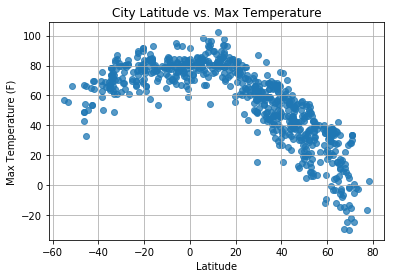

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["MaxTemp"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("LatVTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

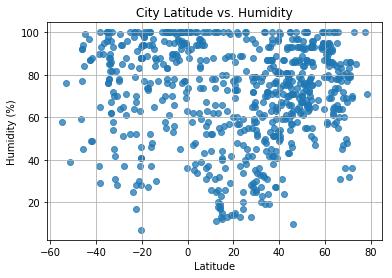

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Humidity"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("LatVHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

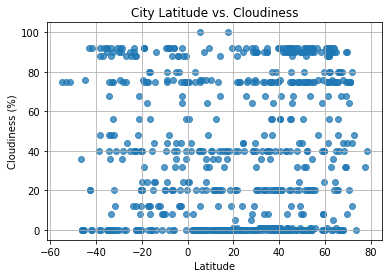

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("LatVCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

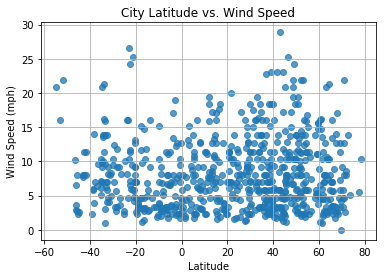

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("LatVWind.png")
plt.show()

In [ ]:
# Obvservable trends

# 1: Temperature vs. latitude peaks just north of the equator and has a steady negative correlation from there.
# 2: Cities higher in latitude usually have higher humidity, though the trend is not entirely consistent.
# 3: Wind speed vs. latitude is generally consistent, though seems to spike around -20 and 40.